# E-Commerce Data
This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts. Many of its customers are wholesalers. 


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("online_retail.csv")
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Data Dictionary
| Variable    | Explanation                                                                                                                       |
|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation. |
| StockCode   | A 5-digit integral number uniquely assigned to each distinct product.                                                             |
| Description | Product (item) name                                                                                                               |
| Quantity    | The quantities of each product (item) per transaction                                                                             |
| InvoiceDate | The day and time when each transaction was generated                                                                              |
| UnitPrice   | Product price per unit in sterling (pound)                                                                                        |
| CustomerID  | A 5-digit integral number uniquely assigned to each customer                                                                      |
| Country     | The name of the country where each customer resides                                                                               |

### 1. Data Cleaning and Inspection
Remove any null values in data frame using .dropna() and used .info() to check the data type. And also, change the data type of InvoiceDate to datetime data type and extract the hour.

In [96]:
#use dropna to drop all have na values
df = df.dropna()

#verify
print(df.isnull().sum())

#convert the datatype of InvoiceDate to datetime
#extract the hour in the InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Hour'] = df['InvoiceDate'].dt.hour

#verify
df.info()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Hour         406829 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 31.0+ MB


### 2. Which products have been returned the most?
In the metadata of the df negative quantity indicates that it's been return.

Text(0, 0.5, 'Item')

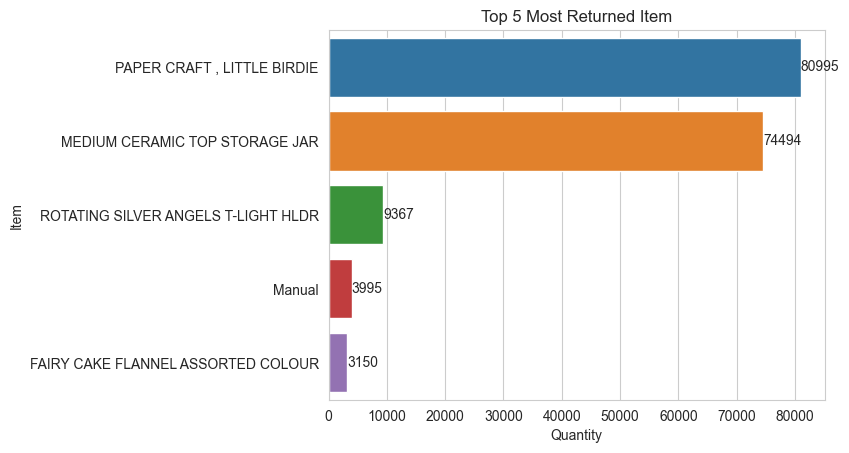

In [97]:
#Filter the below 0 of the quantity column
returned = df.loc[df['Quantity'] < 0]

#group the item in the Description column using groupby method and get the sum of the quantity.
#And also use sort_values method to sort the sum of the Description
most_returned = returned.groupby('Description')['Quantity'].sum().sort_values(ascending = True) \
                        .reset_index()

#use abs method in Quantity column to convert it into positive value
most_returned['Quantity'] = most_returned['Quantity'].abs()

#get the top 5 
most_returned_head = most_returned.head(5)

#use seaborn to plot it
sns.set_style('whitegrid')
barplot1 = sns.barplot(data = most_returned_head, y = 'Description', x = 'Quantity')
barplot1.bar_label(barplot1.containers[0])
barplot1.set_title('Top 5 Most Returned Item')
barplot1.set_ylabel('Item')

### 3. Visualizing the profits earned per hour

Text(0.5, 1.0, 'Profit per Hour')

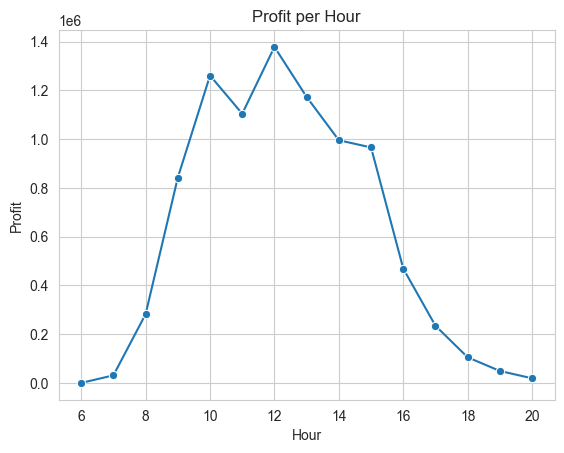

In [98]:
#filter the quantity column that has more than 0 of order
profit = df.loc[df['Quantity'] > 0]

#create a new column that have the product of Quantity and UnitPrice column
profit['Profit'] = profit['Quantity'] * profit['UnitPrice']

#group by hour and get the sum of profit per hour
profit_group = profit.groupby('Hour', as_index = False)['Profit'].sum()

#using seaborn to plot it in lineplot
lineplot = sns.lineplot(data = profit_group, x = 'Hour', y = 'Profit', marker = 'o')
lineplot.set_title("Profit per Hour")

In [99]:
profit_group

,Hour,Profit
0,6,4.250
1,7,31059.210
2,8,282115.630
3,9,842605.171
4,10,1261192.571
5,11,1104558.750
6,12,1378571.480
7,13,1173264.750
8,14,995629.371
9,15,966191.750


### 4. Are orders sizes from countries outside the UK significantly larger than orders from inside the UK?

[Text(0, 0, '12.0489'), Text(0, 0, '20.9327')]

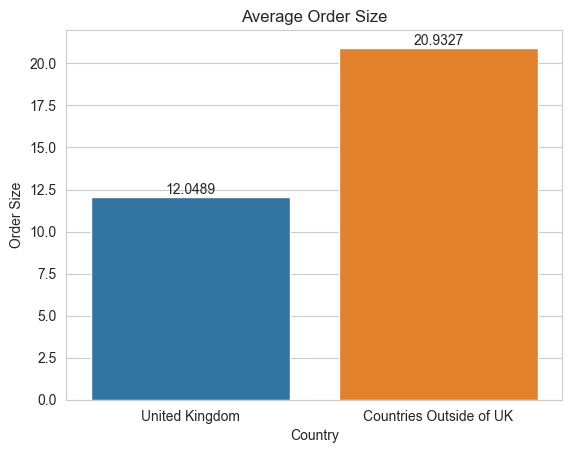

In [100]:
#copy the dataframe of profit_df
orders = profit_df

#fitler the df using .loc to extract the United Kingdom values in Country column
#and get the mean of the Quantity column
orders_uk = orders.loc[orders['Country'] == 'United Kingdom']
orders_uk_mean = orders_uk['Quantity'].mean()


#fitler the df using .loc to extract the orders outside of the United Kingdom in Country column
#and get the mean of the Quantity column
orders_outside = orders.loc[orders['Country'] != 'United Kingdom']
orders_outside_mean = orders_outside['Quantity'].mean()

#make a list of the mean
orders_mean = {
    'Country': ['United Kingdom', 'Countries Outside of UK'],
    'Average Order Sizes': [orders_uk_mean, orders_outside_mean]
}

#conver it into dataframe
orders_df = pd.DataFrame(orders_mean)

#plot it using seaborn barplot
barplot2 = sns.barplot(data = orders_df, x = 'Country', y = 'Average Order Sizes')
barplot2.set_title('Average Order Size')
barplot2.set_ylabel('Order Size')
barplot2.bar_label(barplot2.containers[0])

[Source](https://archive.ics.uci.edu/ml/datasets/online+retail#)  of dataset.

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

## Conclusion

- **PAPER CRAFT, LITTLE BIRDIE** is the most return item
- **1200H** have the most profit
- **Countries Outside of UK** have a larger volume of order